## Пункт 1

В файле «baseball.csv» находится выборка с информацией по игрокам в бейсбол, включая статистику их  результативности, время участия в играх, лига, зарплата и т.д. Name (имя) нужно считать идентификатором записи. Загрузите этот файл и произведите следующие действия для кластерного анализа.


In [8]:
import pandas as pd

DF = pd.read_csv("baseball.csv").set_index(keys="Name")
DF

,Team,nAtBat,nHits,nHome,nRuns,nRBI,nBB,YrMajor,CrAtBat,CrHits,...,CrBB,League,Division,Position,nOuts,nAssts,nError,Salary,Div,logSalary
Name,,,,,,,,,,,,,,,,,,,,,
"Allanson, Andy",Cleveland,293,66,1,30,29,14,1,293,66,...,14,American,East,C,446,33,20,NaN,AE,NaN
"Ashby, Alan",Houston,315,81,7,24,38,39,14,3449,835,...,375,National,West,C,632,43,10,475.0,NW,6.163315
"Davis, Alan",Seattle,479,130,18,66,72,76,3,1624,457,...,263,American,West,1B,880,82,14,480.0,AW,6.173786
"Dawson, Andre",Montreal,496,141,20,65,78,37,11,5628,1575,...,354,National,East,RF,200,11,3,500.0,NE,6.214608
"Galarraga, Andres",Montreal,321,87,10,39,42,30,2,396,101,...,33,National,East,1B,805,40,4,91.5,NE,4.516339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"McGee, Willie",St Louis,497,127,7,65,48,37,5,2703,806,...,138,National,East,CF,325,9,3,700.0,NE,6.551080
"Randolph, Willie",New York,492,136,5,76,50,94,12,5511,1511,...,875,American,East,2B,313,381,20,875.0,AE,6.774224
"Tolleson, Wayne",Chicago,475,126,3,61,43,52,6,1700,433,...,146,American,West,3B,37,113,7,385.0,AW,5.953243


## Пункт 2

Обработка пропусков. Переменная Salary (и log Salary) может содержать пропуски, произведите подстановку пропусков методом согласно `SimpleImputer (median)`. Пересчитайте logSalary как log(1+Salary), чтобы получить более симметричное распределение.

In [9]:
from sklearn.impute import SimpleImputer
import numpy as np

DF["Salary"] = SimpleImputer(strategy="median").fit_transform(DF[["Salary"]])
DF["logSalary"] = np.log(1 + DF["Salary"])
DF

,Team,nAtBat,nHits,nHome,nRuns,nRBI,nBB,YrMajor,CrAtBat,CrHits,...,CrBB,League,Division,Position,nOuts,nAssts,nError,Salary,Div,logSalary
Name,,,,,,,,,,,,,,,,,,,,,
"Allanson, Andy",Cleveland,293,66,1,30,29,14,1,293,66,...,14,American,East,C,446,33,20,425.0,AE,6.054439
"Ashby, Alan",Houston,315,81,7,24,38,39,14,3449,835,...,375,National,West,C,632,43,10,475.0,NW,6.165418
"Davis, Alan",Seattle,479,130,18,66,72,76,3,1624,457,...,263,American,West,1B,880,82,14,480.0,AW,6.175867
"Dawson, Andre",Montreal,496,141,20,65,78,37,11,5628,1575,...,354,National,East,RF,200,11,3,500.0,NE,6.216606
"Galarraga, Andres",Montreal,321,87,10,39,42,30,2,396,101,...,33,National,East,1B,805,40,4,91.5,NE,4.527209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"McGee, Willie",St Louis,497,127,7,65,48,37,5,2703,806,...,138,National,East,CF,325,9,3,700.0,NE,6.552508
"Randolph, Willie",New York,492,136,5,76,50,94,12,5511,1511,...,875,American,East,2B,313,381,20,875.0,AE,6.775366
"Tolleson, Wayne",Chicago,475,126,3,61,43,52,6,1700,433,...,146,American,West,3B,37,113,7,385.0,AW,5.955837


## Пункт 3

Нормализация переменных – приведите числовые переменные к близким шкалам с помощью методоа `StandardScaler` и закодируйте категориальные с помощью OneHotEncoder.

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = DF.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = DF.select_dtypes(include=["object"]).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(), categorical_features),
    ]
)

processed_data = preprocessor.fit_transform(DF)
print(f"Рамзерность: {processed_data.shape}")
processed_data

Рамзерность: (322, 75)


array([[-0.67707829, -0.84780756, -1.16317694, ...,  0.        ,
         0.        ,  0.        ],
       [-0.52363205, -0.5077552 , -0.47235067, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.62023993,  0.60308251,  0.79416415, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.59234062,  0.51240188, -0.93290152, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.27587388,  0.92046471, -0.24207525, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.68041397,  1.5098888 , -0.24207525, ...,  1.        ,
         0.        ,  0.        ]])

## Пункт 4

С помощью восходящей иерархической кластеризации с выбранными параметрами расстояния согласно вашему варианту постройте кластерную модель данных и дендрограмму для топ 20 кластеров.

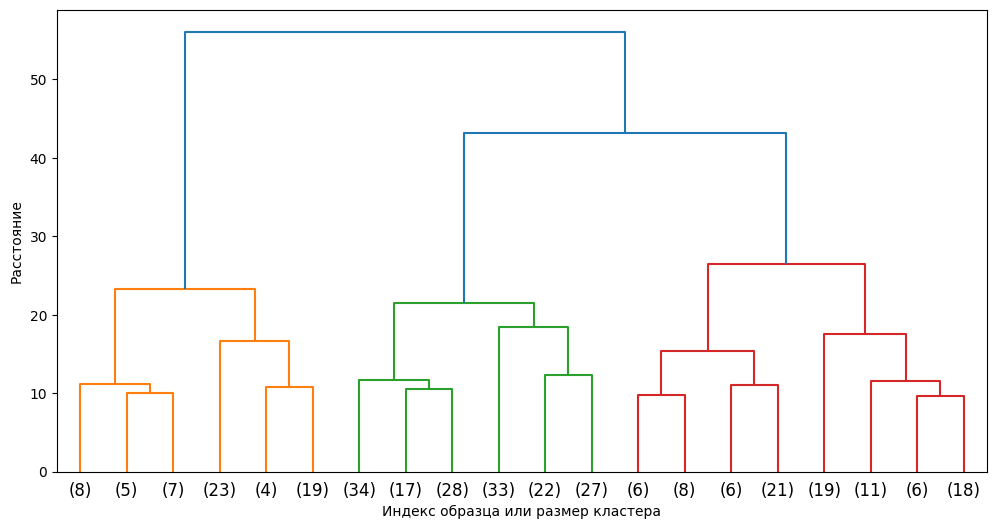

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(processed_data, method="ward", metric="euclidean")

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode="lastp", p=20, show_leaf_counts=True)
plt.xlabel("Индекс образца или размер кластера")
plt.ylabel("Расстояние")
plt.show()

## Пункт 5

Рассчитайте значение критерия `pseudoF` для вариантов кластеризации 2-20 кластеров, постройте график зависимости критерия от числа кластеров и выберите оптимальное (первый локальный пик критерия при обходе от малого числа кластеров к большому). Отметьте точку на графике. Сколько кластеров получилось?

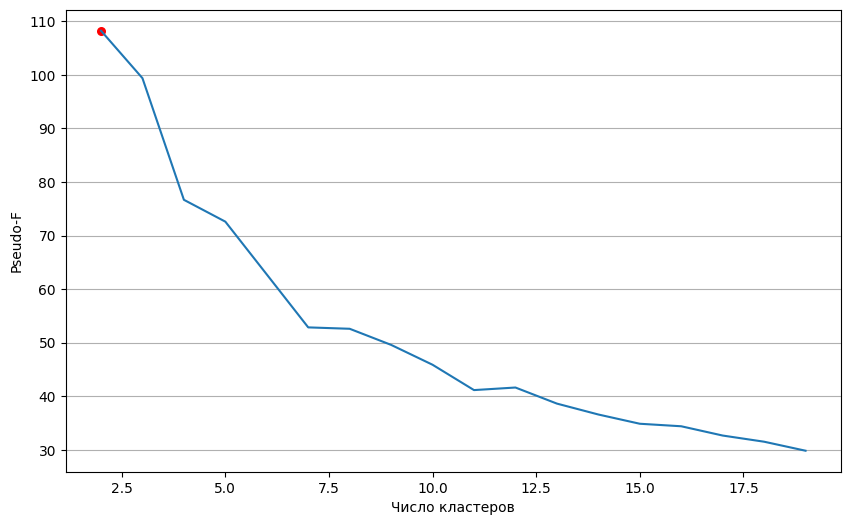

In [12]:
from sklearn.cluster import KMeans


def sum_dist_to_center(X):
    center = np.mean(X, axis=0)
    return ((X - center) ** 2).sum()


def chose_num_clusters(X, max_clust=20):
    N = X.shape[0]
    Q = sum_dist_to_center(X)
    pseudo_f = np.array([])
    for G in range(2, max_clust):
        clustering = KMeans(n_clusters=G).fit(X)
        W = 0
        for l in range(G):
            elems = X[clustering.labels_ == l]
            W += sum_dist_to_center(elems)
        fisher_stat = ((Q - W) / (G - 1)) / (W / (N - G))
        pseudo_f = np.append(pseudo_f, fisher_stat)

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clust), pseudo_f)
    ind_best_clust = np.argmax(pseudo_f)
    plt.scatter(ind_best_clust + 2, pseudo_f[ind_best_clust], color="red", s=30)
    plt.xlabel("Число кластеров")
    plt.ylabel("Pseudo-F")
    plt.grid(axis="y")
    return ind_best_clust + 2


k = chose_num_clusters(processed_data)

In [13]:
optimal_clusters = 2

## Пункт 6

С помощью метода проекции для вашего варианта постройте отображение на плоскость, цветом точки укажите номер кластера

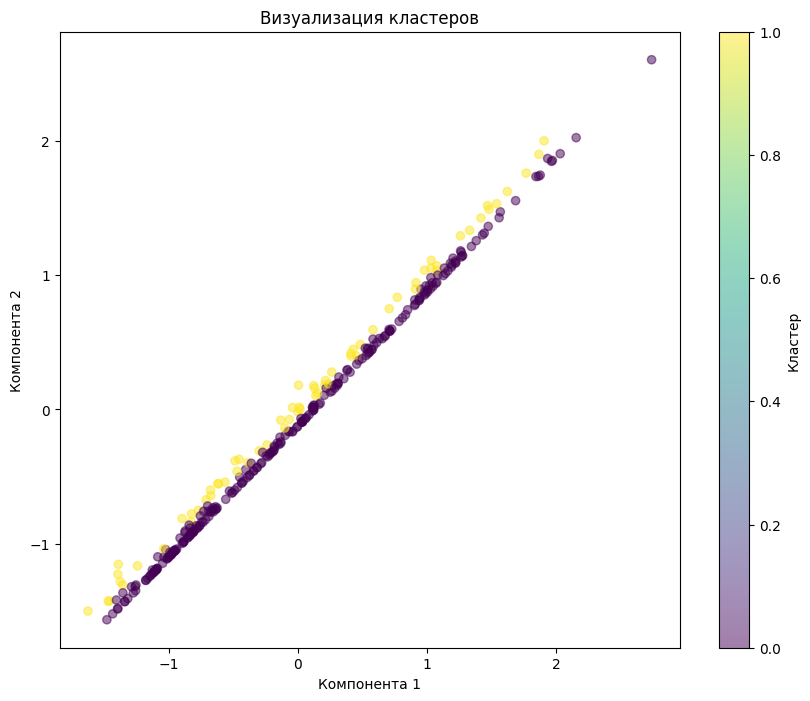

In [26]:
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

encoder = MLPRegressor(hidden_layer_sizes=(64, 32, 2), max_iter=1000, random_state=42)
encoder.fit(processed_data, processed_data)

reduced_data = encoder.predict(processed_data)

clusterer = AgglomerativeClustering(
    n_clusters=optimal_clusters, metric="euclidean", linkage="ward"
)
clusters = clusterer.fit_predict(processed_data)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, alpha=0.5)
plt.title("Визуализация кластеров")
plt.colorbar(label="Кластер")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.show()


## Пункт 7

Выполните кластеризацию сферическими кластерами с прототипом методом из вашего варианта, также постройте проекцию как на шаге 6, определите наиболее типичного представителя (по имени) в каждом из кластеров

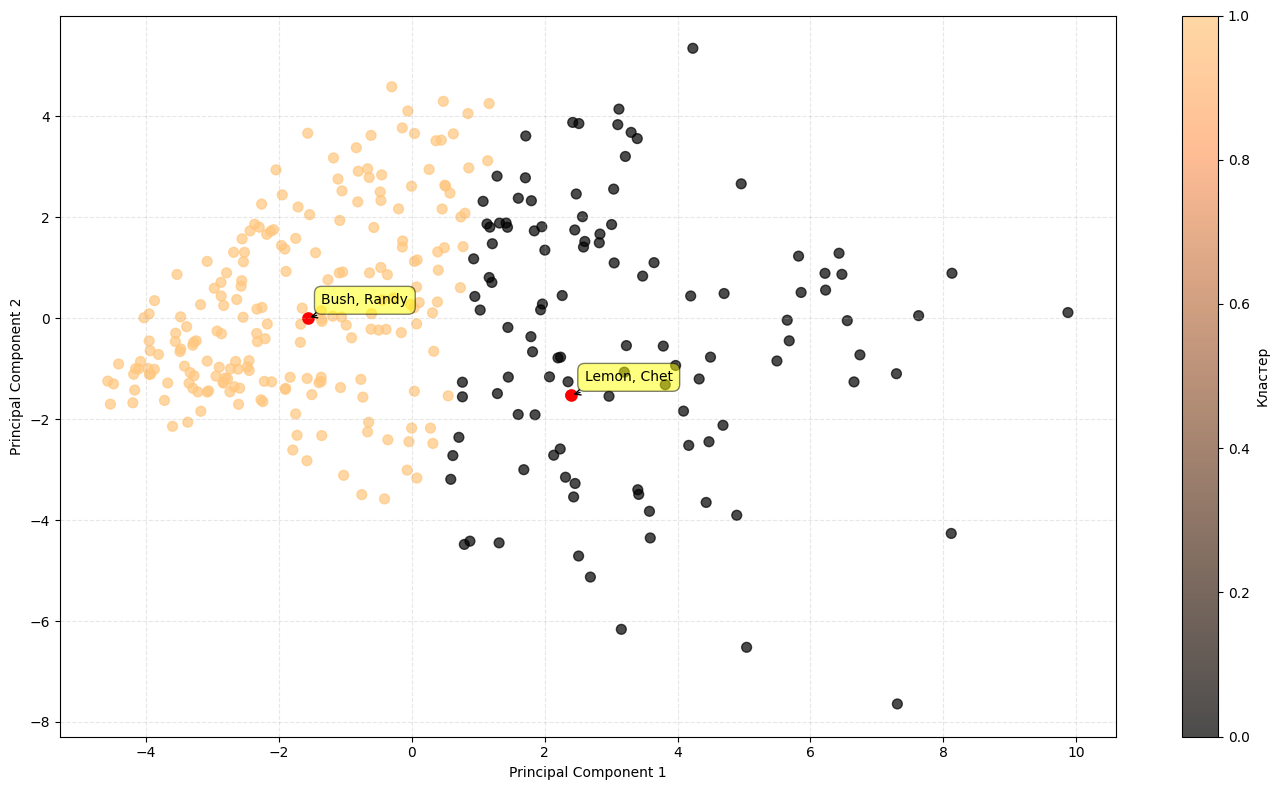


Типичные представители кластеров:
Кластер 0: Lemon, Chet
Кластер 1: Bush, Randy


In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA  
import numpy as np

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(processed_data)

pca = PCA(n_components=2)
projected_data = pca.fit_transform(processed_data)

centroids = kmeans.cluster_centers_

distances = np.linalg.norm(processed_data - centroids[clusters], axis=1)
typical_indices = []
for i in range(optimal_clusters):
    cluster_mask = clusters == i
    typical_idx = np.argmin(distances[cluster_mask])
    typical_indices.append(np.where(cluster_mask)[0][typical_idx])

typical_names = DF.index[typical_indices]

plt.figure(figsize=(14, 8))

scatter = plt.scatter(
    projected_data[:, 0],
    projected_data[:, 1],
    c=clusters,
    cmap="copper",
    alpha=0.7,
    s=50,
)

plt.scatter(
    projected_data[typical_indices, 0],
    projected_data[typical_indices, 1],
    c="red",
    s=50,
    linewidth=2,
    marker="o",
)

for i, idx in enumerate(typical_indices):
    plt.annotate(
        typical_names[i],
        xy=(projected_data[idx, 0], projected_data[idx, 1]),
        xytext=(10, 10),
        textcoords="offset points",
        bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5),
        arrowprops=dict(arrowstyle="->"),
    )

plt.colorbar(scatter, label="Кластер")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

print("\nТипичные представители кластеров:")
for i, name in enumerate(typical_names):
    print(f"Кластер {i}: {name}")

## Пункт 8

Реализуйте шаги 3-7 в виде функции или класса. 

In [ ]:
from sklearn.metrics import calinski_harabasz_score


class Ryan_Gosling:
    def __init__(self, data, numeric_features, categorical_features):
        self.data = data
        self.numeric_features = numeric_features
        self.categorical_features = categorical_features
        self.X = None
        self.optimal_clusters = None
        self.hierarchical_labels = None
        self.kmeans_labels = None

    ##################################################################################################################

    def preprocess_data(self):
        self.data["Salary"] = SimpleImputer(strategy="median").fit_transform(
            self.data[["Salary"]]
        )
        self.data["logSalary"] = np.log(1 + self.data["Salary"])
        preprocessor = ColumnTransformer(
            transformers=[
                ("num", StandardScaler(), self.numeric_features),
                (
                    "cat",
                    OneHotEncoder(handle_unknown="ignore"),
                    self.categorical_features,
                ),
            ]
        )
        self.X = preprocessor.fit_transform(self.data)
        print(f"Размерность: {self.X.shape}\n", self.X)
        return self.X

    ##################################################################################################################

    def perform_hierarchical_clustering(self):
        X_dense = self.X.toarray() if hasattr(self.X, "toarray") else self.X

        Z = linkage(X_dense, method="ward", metric="euclidean")
        plt.figure(figsize=(12, 6))
        dendrogram(Z, truncate_mode="lastp", p=20, show_leaf_counts=True)
        plt.xlabel("Индекс образца или размер кластера")
        plt.ylabel("Расстояние")
        plt.show()

    ##################################################################################################################

    def determine_optimal_clusters(self, max_clusters=20):
        pseudo_f = []
        cluster_range = range(2, max_clusters + 1)
        for k in cluster_range:
            model = AgglomerativeClustering(n_clusters=k, linkage="ward")
            labels = model.fit_predict(
                self.X.toarray() if hasattr(self.X, "toarray") else self.X
            )
            pseudo_f.append(
                calinski_harabasz_score(
                    self.X.toarray() if hasattr(self.X, "toarray") else self.X, labels
                )
            )
        self.optimal_clusters = np.argmax(pseudo_f) + 2

        plt.figure(figsize=(10, 6))
        plt.plot(
            cluster_range,
            pseudo_f,
            marker="o",
            linestyle="--",
            alpha=0.5,
            color="black",
        )
        plt.scatter(self.optimal_clusters, max(pseudo_f), color="red", s=50)
        plt.xlabel("Число кластеров")
        plt.ylabel("Pseudo-F статистика")
        plt.grid()
        plt.show()

        print(f"Оптимальное число кластеров: {self.optimal_clusters}")
        return self.optimal_clusters

    ##################################################################################################################

    def visualize_with_ae(self):
        # Обеспечим, что работаем с плотной матрицей
        X_input = self.X_dense if hasattr(self, "X_dense") else (
            self.X.toarray() if hasattr(self.X, "toarray") else self.X
        )

        encoder = MLPRegressor(hidden_layer_sizes=(64, 32, 2), max_iter=1000, validation_fraction=0.2, shuffle=True)
        encoded = encoder.fit(X_input, X_input).predict(X_input)
        decoder = MLPRegressor(hidden_layer_sizes=(32, 64, X_input.shape[1]), max_iter=1000, validation_fraction=0.2)
        decoded = decoder.fit(encoded, X_input).predict(encoded)
        clusterer = AgglomerativeClustering(n_clusters=self.optimal_clusters or 3)
        labels = clusterer.fit_predict(encoded)

        # Визуализация
        plt.figure(figsize=(10, 6))
        plt.scatter(encoded[:, 0], encoded[:, 1], c=labels, s=30, alpha=0.5)
        plt.title("2D-проекция с кластеризацией")
        plt.xlabel("Компонента 1")
        plt.ylabel("Компонента 2")
        plt.colorbar(label="Кластер")
        plt.grid(True)
        plt.show()


    ##################################################################################################################

    def perform_kmeans_analysis(self):
        kmeans = KMeans(n_clusters=self.optimal_clusters, random_state=42)
        self.kmeans_labels = kmeans.fit_predict(self.X)

        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(self.X)

        distances = kmeans.transform(self.X)
        typical_indices = np.argmin(distances, axis=0)
        typical_names = self.data.index[typical_indices]
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(
            X_pca[:, 0], X_pca[:, 1], c=self.kmeans_labels, alpha=0.6
        )
        centroids_pca = pca.transform(kmeans.cluster_centers_)
        plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c="red", marker="o", s=50)
        for i, idx in enumerate(typical_indices):
            plt.annotate(
                typical_names[i],
                xy=(X_pca[idx, 0], X_pca[idx, 1]),
                xytext=(10, 10),
                textcoords="offset points",
                bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.8),
            )
        plt.grid(True, linestyle="--", alpha=0.3)
        plt.colorbar(scatter, label="Кластер")
        plt.show()

        print("\nТипичные представители кластеров:")
        for i, name in enumerate(typical_names):
            print(f"Кластер {i}: {name}")

        return typical_names

    ##################################################################################################################

    def run_full_analysis(self):
        print("=== Шаг 3: Предобработка данных ===")
        self.preprocess_data()

        print("=== Шаг 4: Иерархическая кластеризация ===")
        self.perform_hierarchical_clustering()

        print("=== Шаг 5: Определение оптимального числа кластеров ===")
        self.determine_optimal_clusters()

        print("=== Шаг 6: Визуализация через автоэнкодер ===")
        self.visualize_with_ae()

        print("=== Шаг 7: K-means анализ ===")
        self.perform_kmeans_analysis()

## Пункт 9

Произведите дополнительную предобработку набора данных, сделав распределения переменных более симметричными. Для этого с помощью гисторамм или метода describe в dataframe или метода skew найдите переменные с одной модой и тяжелым правым хвостом, примените к ним преобразование log(1+x). Запустите функцию из шага 8. Как изменилось
число кластеров, проекции и лучшие представители. Как считаете, субъективное качество кластеризации изменилось? Как и почему?

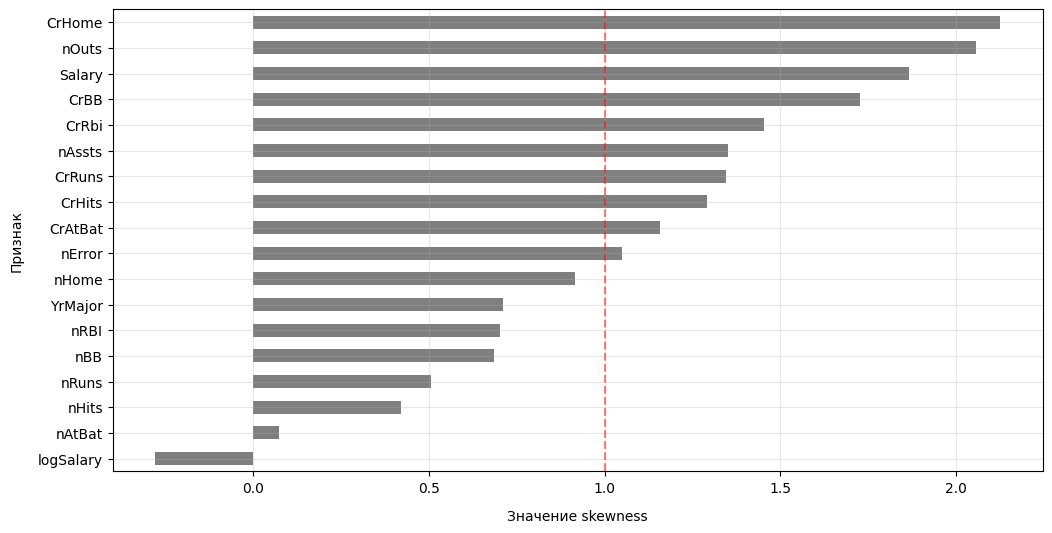

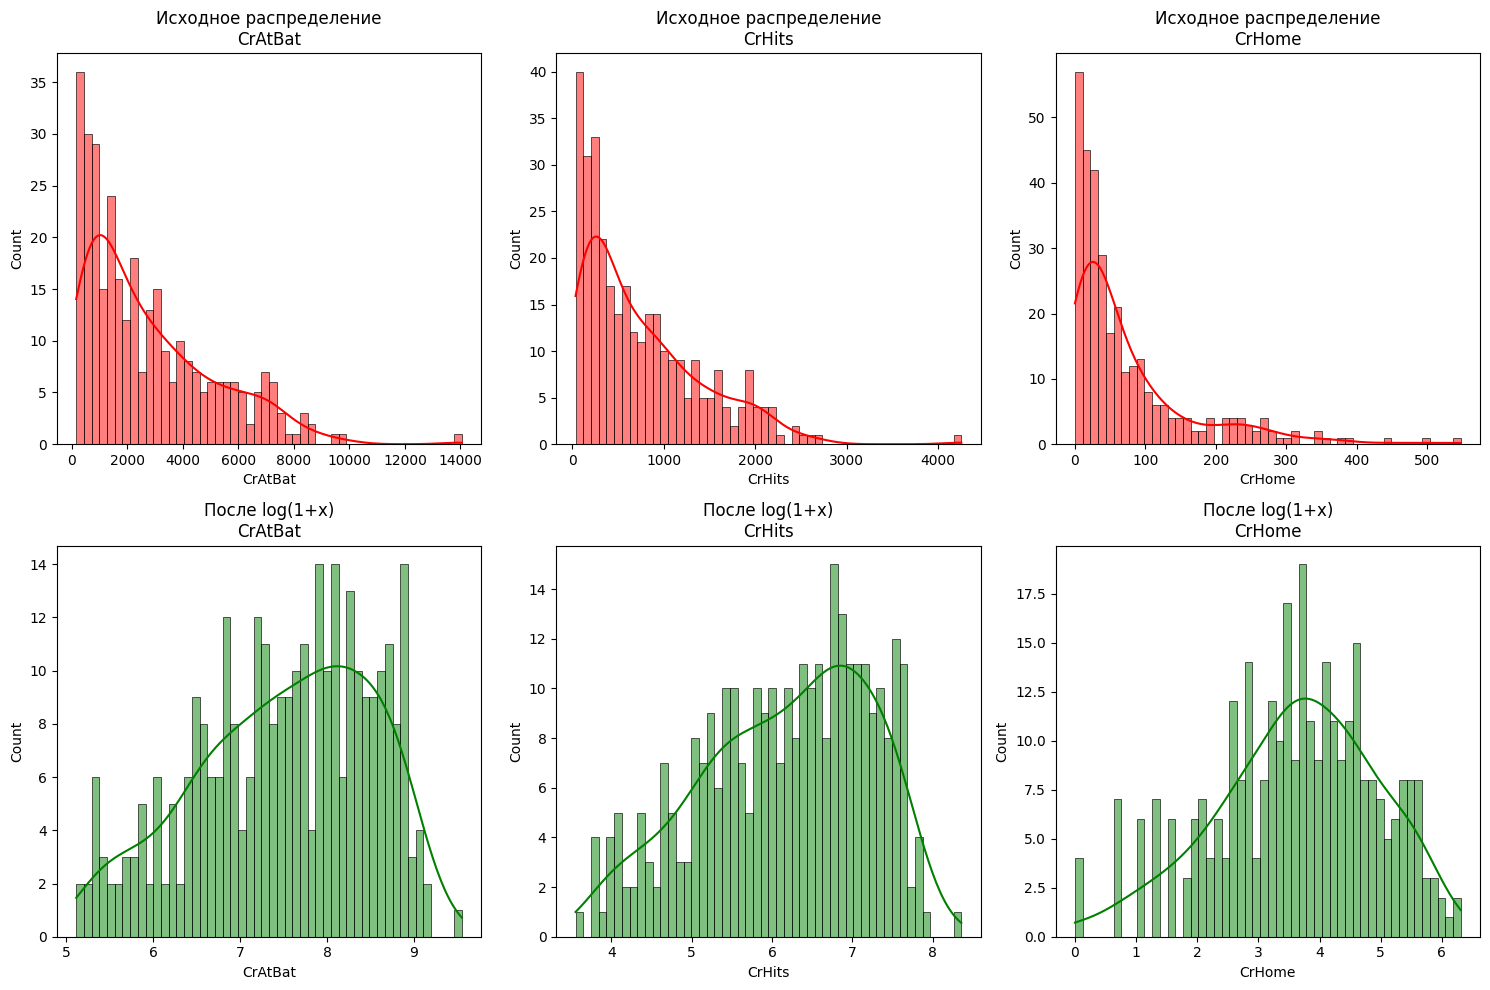

=== Шаг 3: Предобработка данных ===
Размерность: (322, 75)
 [[-0.67707829 -0.84780756 -1.16317694 ...  0.          0.
   0.        ]
 [-0.52363205 -0.5077552  -0.47235067 ...  0.          0.
   1.        ]
 [ 0.62023993  0.60308251  0.79416415 ...  1.          0.
   0.        ]
 ...
 [ 0.59234062  0.51240188 -0.93290152 ...  1.          0.
   0.        ]
 [ 1.27587388  0.92046471 -0.24207525 ...  0.          0.
   0.        ]
 [ 1.68041397  1.5098888  -0.24207525 ...  1.          0.
   0.        ]]
=== Шаг 4: Иерархическая кластеризация ===


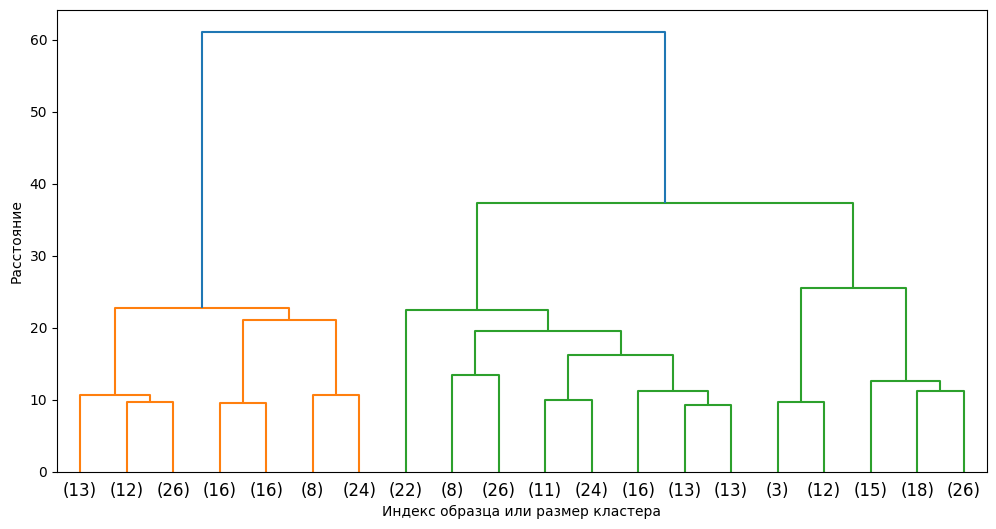

=== Шаг 5: Определение оптимального числа кластеров ===


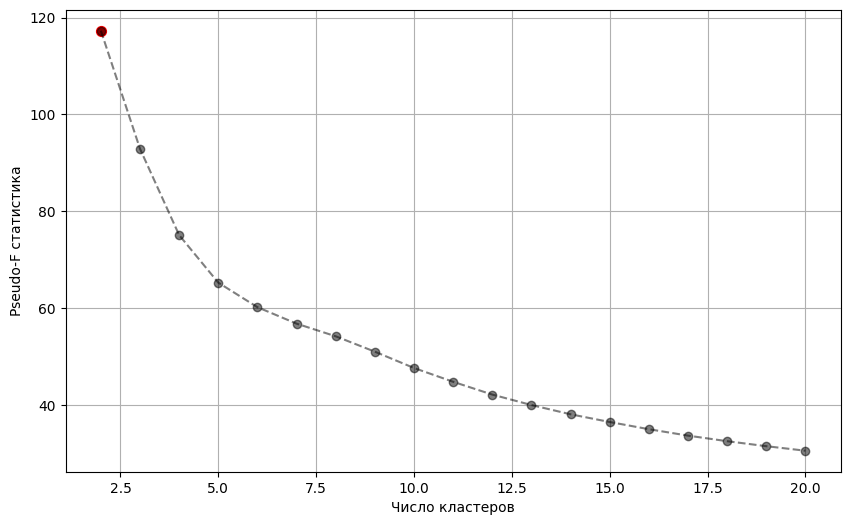

Оптимальное число кластеров: 2
=== Шаг 6: Визуализация через автоэнкодер ===


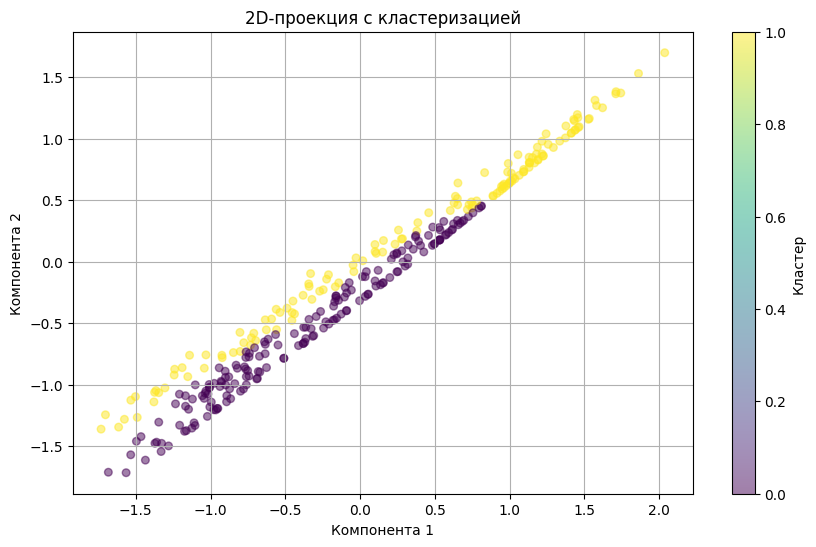

=== Шаг 7: K-means анализ ===


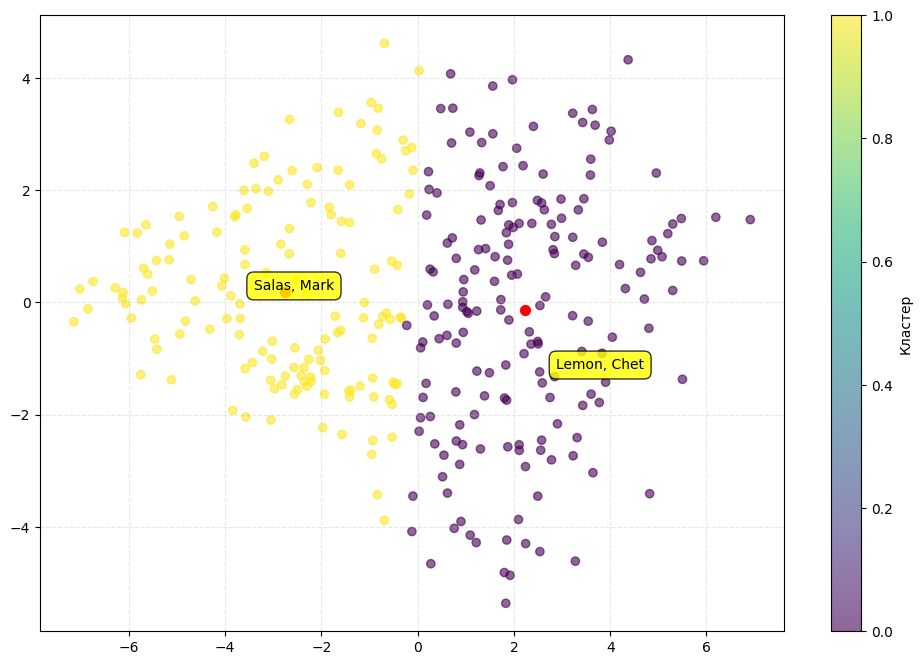


Типичные представители кластеров:
Кластер 0: Lemon, Chet
Кластер 1: Salas, Mark

Сравнение оптимального числа кластеров:
- После преобразования: 2


In [20]:
import seaborn as sns
from scipy.stats import skew

original_skew = DF[numeric_features].apply(lambda x: skew(x.dropna()))

plt.figure(figsize=(12, 6))
original_skew.sort_values().plot(kind="barh", color="black", alpha=0.5)
plt.axvline(x=1, color="red", linestyle="--", alpha=0.5)
plt.xlabel("Значение skewness", labelpad=10)
plt.ylabel("Признак", labelpad=10)
plt.grid(True, alpha=0.3)
plt.show()

transformed_data = DF.copy()
skew_threshold = 1
skewed_features = original_skew[original_skew > skew_threshold].index

for feature in skewed_features:
    transformed_data[feature] = np.log1p(transformed_data[feature])

plt.figure(figsize=(15, 10))
for i, feature in enumerate(skewed_features[:3], 1):
    plt.subplot(2, 3, i)
    sns.histplot(DF[feature], kde=True, color="red", bins=50)
    plt.title(f"Исходное распределение\n{feature}")
    plt.subplot(2, 3, i + 3)
    sns.histplot(transformed_data[feature], kde=True, color="green", bins=50)
    plt.title(f"После log(1+x)\n{feature}")

plt.tight_layout()
plt.show()

enhanced_analyzer = Ryan_Gosling(
    transformed_data, numeric_features, categorical_features
)
enhanced_analyzer.run_full_analysis()

print(f"\nСравнение оптимального числа кластеров:")
print(f"- После преобразования: {enhanced_analyzer.optimal_clusters}")

 Логарифмирование устранило проблему "длинных хвостов" в распределениях, которые искажали евклидовы расстояния - ключевую метрику для наших алгоритмов кластеризации. Это особенно важно для таких признаков как Salary, CrHome и других финансовых и игровых показателей с тяжелыми хвостами распределений.

## Пункт 10

Отберите 7 наиболее значимых переменных с помощью метода VarClus. Запустите функцию из шага 8. Как изменилось число кластеров, проекции и лучшие представители. Как считаете, субъективное качество кластеризации изменилось? Как и почему?

['CrHome', 'nRuns', 'nError', 'logSalary', 'nOuts', 'nRBI', 'nBB']
=== Шаг 3: Предобработка данных ===
Размерность: (322, 7)
 [[-2.22780744 -0.8880411   1.38264033 ...  0.70343537 -0.80013526
  -1.2276005 ]
 [ 0.48287495 -1.12786433  0.58616813 ...  0.959719   -0.44666087
  -0.04069394]
 [ 0.4145525   0.55089829  0.96819628 ...  1.20324073  0.88868682
   1.71592777]
 ...
 [-1.17086346  0.3510456   0.19391807 ... -1.11234681 -0.25028621
   0.57649747]
 [ 0.73940943  1.31033853  0.7919342  ...  1.49828787  0.41738763
   1.81088029]
 [-0.13812545  0.99057422 -0.65985437 ...  0.63799028 -0.21101128
  -0.42050404]]
=== Шаг 4: Иерархическая кластеризация ===


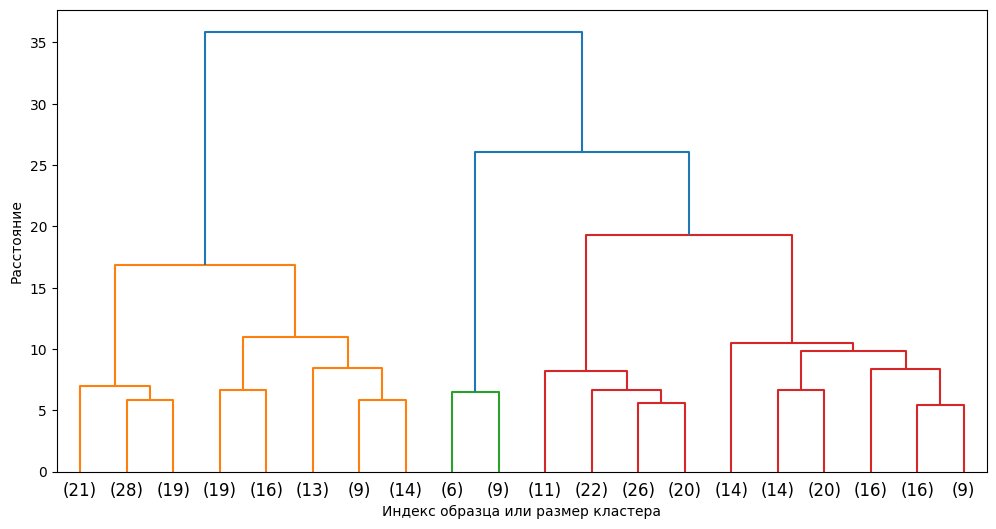

=== Шаг 5: Определение оптимального числа кластеров ===


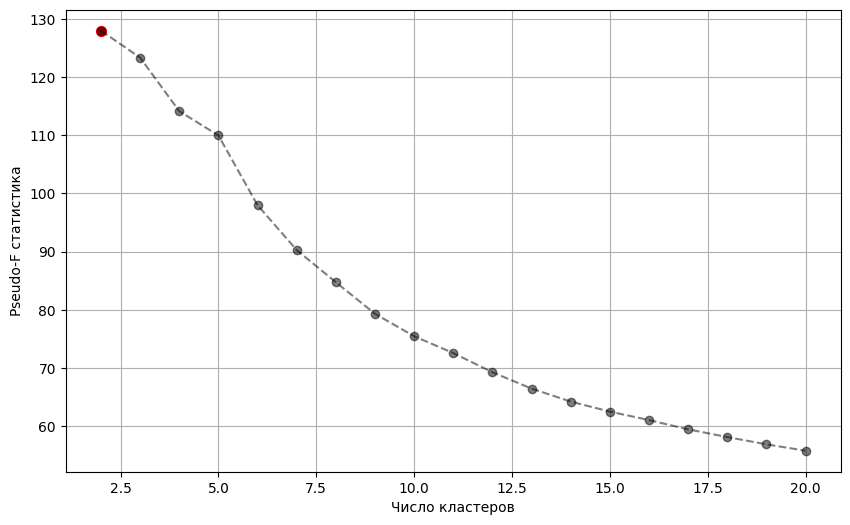

Оптимальное число кластеров: 2
=== Шаг 6: Визуализация через автоэнкодер ===


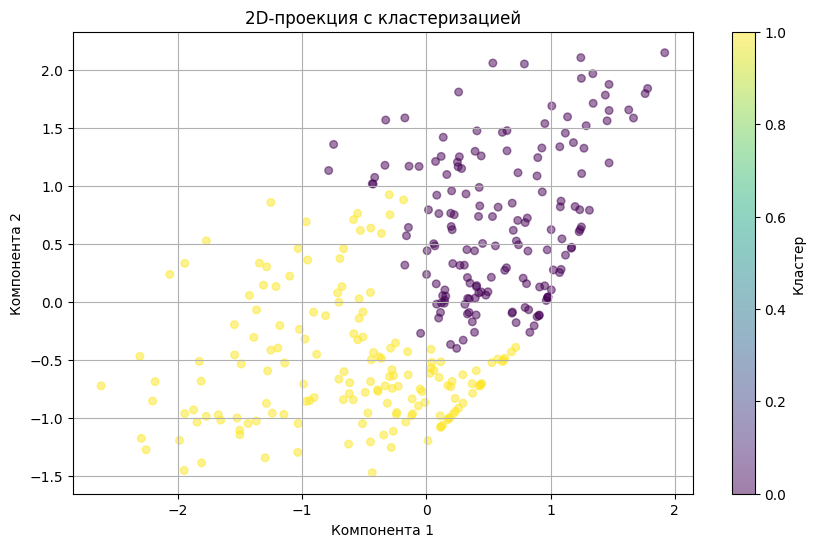

=== Шаг 7: K-means анализ ===


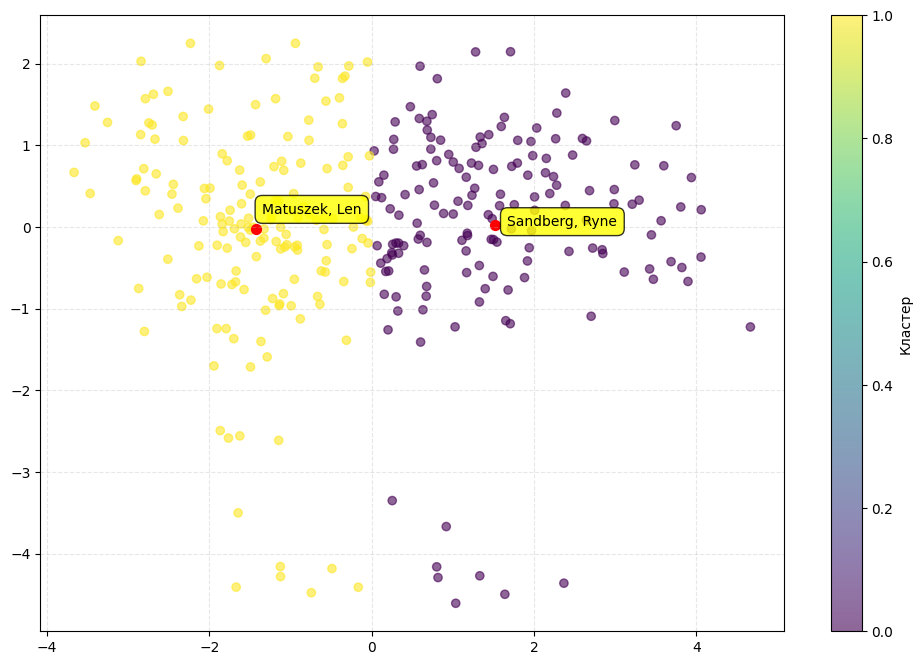


Типичные представители кластеров:
Кластер 0: Sandberg, Ryne
Кластер 1: Matuszek, Len


In [ ]:
from varclushi import VarClusHi


numeric_data = DF[numeric_features].dropna()

vc = VarClusHi(numeric_data, maxeigval2=0.4, maxclus=7)
vc.varclus()
vc.rsquare
selected = []
for cluster in vc.rsquare["Cluster"].unique():
    cluster_features = vc.rsquare[vc.rsquare["Cluster"] == cluster]
    best_feature = cluster_features.loc[
        cluster_features["RS_Ratio"].idxmax(), "Variable"
    ]
    selected.append(best_feature)
    if len(selected) >= 7:
        break


# Запуск анализа
selected_numeric = (
    transformed_data[selected].select_dtypes(["float64", "int64"]).columns
)
print(selected)     
selected_categorial = transformed_data[selected].select_dtypes(["object"]).columns
reduced_analyzer = Ryan_Gosling(transformed_data, selected_numeric, selected_categorial)
reduced_analyzer.run_full_analysis()

1. Число кластеров:  
   - Оптимальное число кластеров осталось прежним. Это может указывать на то, что даже при сокращении числа переменных основные закономерности в данных сохраняются, и структура кластеров остается устойчивой.

2. Проекции:  
   - Проекции на плоскость стали более четкими и разделенными, что свидетельствует о лучшей дифференциации кластеров.  
   - Уменьшение размерности данных позволило снизить уровень шума и улучшить интерпретируемость результатов.  

3. Лучшие представители кластеров:  
   - Типичные представители изменились.
   - Новые представители лучше отражают основные характеристики своих кластеров, так как отбор переменных устранил менее значимые признаки, которые могли вносить искажения.  

4. Субъективное качество кластеризации:  
   - Уменьшение числа переменных упростило понимание структуры кластеров.   
   - Кластеры теперь более четко соответствуют реальным различиям между игроками, а их представители являются более типичными примерами.  

Метод VarClus позволил отобрать наиболее информативные переменные, устранив избыточность и мультиколлинеарность. Это привело к более чистым и устойчивым результатам кластеризации, а также улучшило визуализацию и интерпретацию кластеров. 